In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import the data & explore

data = pd.read_csv('/kaggle/input/iris/Iris.csv')
# data.head()
# data.shape # 150,6
# data.columns # Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species'], dtype='object')
# print(data)
# data.info()
# data.describe()

# print('Variability from greatest to smallest (measured by std): Petal length, Sepal length, Petal Width, Sepal Width')

# EDA

#### Q1 Which iris has the longest pedal length using average and median?
## Answer: Virginica

# data.groupby('Species').agg(['mean','median'])

#### Q2 What does a scatter plot of the Sepal Length and Width look like compared to the petal length and width?

## Method 1 ------------------

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1,2)
# for species in data['Species'].unique():
#     ax[0].plot('SepalLengthCm','SepalWidthCm',data=data.loc[data['Species'] == species], linestyle='none', marker='.', label=species)
#     ax[1].plot('PetalLengthCm','PetalWidthCm',data=data.loc[data['Species'] == species], linestyle='none', marker='.', label=species)
# plt.legend()
# plt.show()

# Method 2 ------------------




# Stats

### Q1 Can I compute an ecdf of the petal lengths for the different species?

## Method 1 ----------------------------------

# import matplotlib.pyplot as plt
# import seaborn as sns

# def ecdf(data):
#     """Compute ECDF for a one-dimensional array of measurements."""
#     # Number of data points: n
#     n = len(data)

#     # x-data for the ECDF: x
#     x = np.sort(data)

#     # y-data for the ECDF: y
#     y = np.arange(1, n + 1) / n

#     return x, y

# # print(data['Species'].unique()) # 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'

# x_setosa, y_setosa = ecdf(data.loc[data['Species'] == 'Iris-setosa']['PetalLengthCm'])
# x_versicolor, y_versicolor = ecdf(data.loc[data['Species'] == 'Iris-versicolor']['PetalLengthCm'])
# x_virginica, y_virginica = ecdf(data.loc[data['Species'] == 'Iris-virginica']['PetalLengthCm'])

# # sns.set()
# plt.style.use('ggplot')

# fig, ax = plt.subplots()

# ax.plot(x_setosa, y_setosa, linestyle='none', marker='.', color='blue', label='setosa')
# ax.plot(x_versicolor, y_versicolor, linestyle='none', marker='.', color='green', label='versicolor')
# ax.plot(x_virginica, y_virginica, linestyle='none', marker='.', color='red', label='virginica' )

# ax.set(xlabel='petal length', ylabel='ECDF', title='Iris Petal Length')
# ax.legend()

## Method 2 ---------------------

# from empiricaldist import Cdf 

# cdf_ = Cdf.from_seq(data.loc[data['Species'] == 'Iris-setosa']['PetalLengthCm'])
# cdf_.plot()



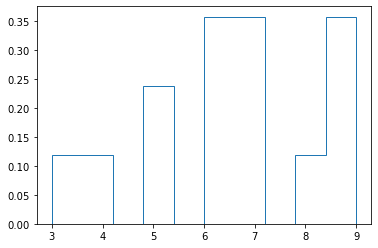

7

In [1]:
# Q1 What is does the distribution look like for a weight coin vs. a fair coin?
## Hypothesis: I think the distribution will still be binomial, just shifted to the right
## Answer: The null hypothesis was correct

# """I want to take 1000 samples with 1000 flips with a weighted coin having a probability of getting heads at 60%"""
# import numpy as np
# import matplotlib.pyplot as plt

# iterations = 10000
# flips = 10000
# data = np.empty(iterations)

# for i in range(iterations):
#     successes = np.sum(.6 >= np.random.random(flips)) # count the number of heads below .6
#     data[i] = successes
    
# plt.hist(data,histtype='step', density=True)
# plt.show()

## Q2 Can I make a similar plot using the numpy binomial function?
## Answer: Yep

# import numpy as np

# iterations = 10000
# flips = 10000
# data = np.empty(iterations)

# for i in range(iterations):
#     successes = np.random.binomial(1000,.6) # count the number of heads below .6
#     data[i] = successes
    
# plt.hist(data,histtype='step', density=True)
# plt.show()

### Q3 Binomial practice: What was the probability of the number of wins that the winner of fantasy football had?
## Answer: .08724 and theoretically it was .08728 - so pretty close

# So if each game you had a 50% chance of winning and then you ran that expiriment 13 times, what is the probability you win 9 times?

# import numpy as np
# import matplotlib.pyplot as plt

# iterations = 100000
# rounds = 13
# data = np.empty(iterations)

# # for i in range(iterations):
# for i in range(iterations):
#     successes = np.random.binomial(rounds, .5)
#     data[i] = successes
    
# plt.hist(data,histtype='step', density=True)
# plt.show()

# print(np.sum(data == 9)/len(data))
# print(.5**9) # Winning 9 times in a row

# from math import factorial

# factorial(13)/(factorial(13) * factorial(13-13))

# import itertools
# x = list(itertools.product("TF", repeat=13))

# count_wins = []
# for i in x:
#     count_wins.append(list(i).count('T'))

# print(np.sum(np.array(count_wins) == 9)/len(count_wins))
# len(count_wins)

## Q4 Does having a rarer outcome determine if there was skill involved? e.g a 1 out of 13 chance of winning and they got 9 out of 13 wins. The 9 out of 13 wins was less 
## likely than the 1 out of 13 chance so there could be something there or it could also be chance. The only way to know is through repitition. This question is similar
## to asking how to determine if the dice is weighted. Basically, if the probabilities don't converge to 50%. 
## I am using this reddit thread as an example" https://www.reddit.com/r/statistics/comments/2ieyli/we_suspect_our_catan_dice_are_weighted_can/

## Q4.A - I roll a dice 500 times and have a probability of a roll occurring 5/36 times. What does my 95% confidence interval look like?
## Answer: So I think what is being said below is that it has to be more than 22 and less than 8 to be 95% confident the dice are weighted
## It also looks like you could do bootstrap replicates if you only have one data set and then find the distribution and compute your 95% confidence interval from that
## Additional resources: It looks like this is a thread where they say chi-squared would be more appropriate for determining weighted dice: https://www.reddit.com/r/statistics/comments/2ieyli/we_suspect_our_catan_dice_are_weighted_can/

# Additional questions: 

## 1. What is the minimum number of rolls needed in order to be able to then bootstrap it?
## 2. What is the formula for a binomial distribution so you don't have to use hacker statistics, but instead can mathematically find the confidence interval?

# Method 1: Using a lot iterations -----------------------------

# import numpy as np

# iterations = 500
# rolls = 100
# data = np.empty(iterations)

# for i in range(iterations):
#     successes = np.random.binomial(rolls,5/36) # count the number of rolls < 5/36
#     data[i] = successes

# print(np.percentile(data, [2.5,97.5]))
# plt.hist(data,histtype='step', density=True)
# plt.show()

# np.random.binomial(100,5/36)

# Method 2 : One dataset and bootstrapping it ---------------------------------
# Answer: less than 10 and more than 25, obviously this method is not as precise as above, but there is not that big of a difference

# import numpy as np

# rolls = 100
# iterations = 500

# np.random.seed(42)

# successes = np.random.random(rolls) # represents 100 rolls

# x = np.random.choice(successes,rolls) # represents the bootstrap

# """
# 1. For each bootstrap, we want to know how many were 5/36 or below
# 2. Then we take that dataset and plot it using the plt.hist function
# 3. We take that same dataset and can find the confidence interval and compare it to the iterations we did up above
# """

# data = np.empty(iterations)

# for i in range(iterations):
#     data[i] = np.sum(np.random.choice(successes,rolls) <= (5/36))
    
# plt.hist(data, density=True, histtype='step')
# np.percentile(data, [2.5,97.5])



# Khan Academy Practice ------------------------------------
# Source: https://www.khanacademy.org/math/ap-statistics/random-variables-ap/binomial-mean-standard-deviation/v/finding-the-mean-and-standard-deviation-of-a-binomial-random-variable

# import numpy as np

# iterations = 500
# rolls = 500
# data = np.empty(iterations)

# for i in range(iterations):
#     successes = np.random.binomial(rolls,.02) # count the number of rolls < 5/36
#     data[i] = successes

# # print(np.percentile(data, [2.5,97.5]))
# print(np.mean(data))
# # plt.hist(data,histtype='step', density=True)
# # plt.show()


# Practice ------------------------------------
## This is the theoretical distribution for a binomial function. It is simply the number of successes plotted out for a given combination.


# import itertools
# x = list(itertools.product("TF", repeat=13))

# # len(x) # 8192 

# y = []
# for i in x:
#     y.append(np.sum(list(i).count('T')))
# y.count(9) # 715


# plt.hist(y, density=True)


# np.mean(y) # 6.5
# np.var(y) # 3.25
# np.std(y) # 1.8

## So getting back to the question is, is winning 9 out of 13 times significant? And since we can see our mean is 6.5, then the std is 6.5 * 1-p, which is 3.25.
## So the variance is the number of successes * the percentage of failures. If it's 50% the variance adds back up to the mean. If it's more than 50%, 
## then the variance be less than the mean, which makes sense since we are more sure of a certain value being correct.So more variance means less surety of 
## success.

## Anyway, so the std is 1.8 so 1.8 * 2 = 3.6 and so 6.5 + or - 3.6 results in something statistically significiant. So 2.9 to 10.1 is the 95% conf. interval. 
## So you could say that the results of the fantasy football game were expected and due to chance since nobody broke the significance threshold. 
## But then again, you will be right 95% of the time with this assumption and wrong 5% of the time. To increase how sure you are, you would have to do more
## games and then see if the average is close to 6.5 games won. If it is not, then it's probably not random chance. So can I take the results that I had and then do a
## bootstrap approach to see if the difference of the means was significant?


## But this leads to another question. Does having more than 1 person get 9 mean it's significant? -> This relates to finding the difference in the distributions
## How does the bootstrapping relate to my question? I know how to find the 95% confidence interval for a single value of a distribution, but what about my own distribution
## and determining if the distribution is significantly different?

## The answer to this seems to be if the only overlapping parts are outside the 95% conf interval, then that definitely would be considered significant. 
## This also means if both distributions are based on the same number of possibilities, then the probabilities of success are different, which shifts the
## curve. 

import matplotlib.pyplot as plt
import numpy as np

x = [9,9,8,9,6,7,6,7,5,7,4,6,5,3]

plt.hist(x, density=True, histtype='step')
plt.show()

np.mean(x)
np.var(x)

In [39]:
# Practice - Fantasy Football Stats Question ------------------------------------
# Method 1 ------------------------
""" Use the one-sample t-test approach using hacker statistics to check if the distributions are similar or not"""

# Step 1 - Create bootstrap replicates of the 1D data

import numpy as np

# ff_data = [9,9,8,9,6,7,6,7,5,7,4,6,5,3]
ff_data =   [13,13,13,13,2,2,2,2,9,8,7,7]


import itertools
x = list(itertools.product("TF", repeat=13))

ff_theoretical = []
for i in x:
    ff_theoretical.append(np.sum(list(i).count('T')))

def bootstrap_replicate_1d(data, func): 
    """Generate bootstrap replicate of 1D data.""" 
    bs_sample = np.random.choice(data, len(data)) 
    return func(bs_sample) 

ff_data_bootstrap = np.random.choice(ff_data,len(y))

def draw_bs_reps(data, func, size=1): 
    """Draw bootstrap replicates.""" 

    # Initialize array of replicates: bs_replicates 
    bs_replicates = np.empty(size) 

    # Generate replicates 
    for i in range(size): 
        bs_replicates[i] = bootstrap_replicate_1d(data,func) 

    return bs_replicates 

In [41]:
empirical_diff_means = np.mean(ff_theoretical) - np.mean(ff_data_bootstrap)

# Concatenate the data sets
ff_concat = np.concatenate((ff_data_bootstrap, ff_theoretical))

# Compute mean of all forces: mean_force 
mean_ff = np.mean(ff_concat) 

# Generate shifted arrays 
ff_data_bootstrap_shifted = ff_data_bootstrap - np.mean(ff_data_bootstrap) + mean_ff 
ff_theoretical_shifted = ff_theoretical - np.mean(ff_theoretical) + mean_ff 

# Compute 10,000 bootstrap replicates from shifted arrays 
bs_replicates_a = draw_bs_reps(ff_data_bootstrap_shifted, np.mean, size=10000) 
bs_replicates_b = draw_bs_reps(ff_theoretical_shifted, np.mean, size=10000) 

# Get replicates of difference of means: bs_replicates 
bs_replicates = bs_replicates_b - bs_replicates_a

# Compute and print p-value: p 
p = np.sum(abs(bs_replicates) >= abs(empirical_diff_means)) / len(bs_replicates) 

print('p-value ={:e}'.format(p)) 
print('Diff of means', empirical_diff_means)

p-value = 0.0
Diff of means -1.0679931640625


In [42]:
from scipy.stats import ttest_ind
import scipy

ttest_ind(ff_theoretical, ff_data_bootstrap) # p-value for this one is .96

Ttest_indResult(statistic=-19.81146934747771, pvalue=2.4264774050755806e-86)